In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Step 1: Definining the path to the dataset in the Downloads folder
file_path = '/Users/vedshukla/Library/Mobile Documents/com~apple~CloudDocs/Mobile_user/user_behavior_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [19]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [20]:
# Renaming columns to remove spaces and make them shorter
df.columns = [
    'user_id', 
    'device_model', 
    'os', 
    'app_usage_time', 
    'screen_on_time', 
    'battery_drain', 
    'num_apps_installed', 
    'data_usage', 
    'age', 
    'gender', 
    'user_behavior_class'
]

# Dropping the 'user_id' column as it's not needed for clustering
df = df.drop(columns=['user_id'])

In [22]:
df

,device_model,os,app_usage_time,screen_on_time,battery_drain,num_apps_installed,data_usage,age,gender,user_behavior_class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [21]:
# Checking for any remaining missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
device_model           0
os                     0
app_usage_time         0
screen_on_time         0
battery_drain          0
num_apps_installed     0
data_usage             0
age                    0
gender                 0
user_behavior_class    0
dtype: int64


/Users/vedshukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedshukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedshukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedshukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

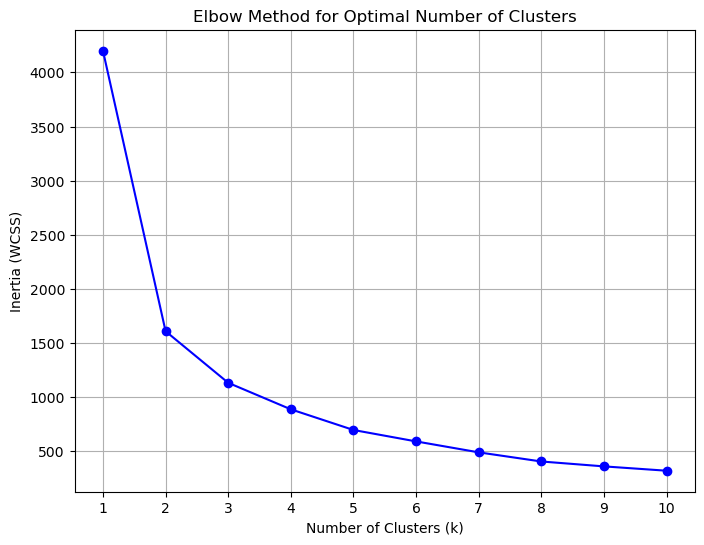

k = 1, Inertia (SSE) = 4200.000000000001
k = 2, Inertia (SSE) = 1609.519089171413
k = 3, Inertia (SSE) = 1133.176272891874
k = 4, Inertia (SSE) = 888.2916107501301
k = 5, Inertia (SSE) = 697.4517540593205
k = 6, Inertia (SSE) = 592.017597332647
k = 7, Inertia (SSE) = 490.9359604927547
k = 8, Inertia (SSE) = 406.5556529667247
k = 9, Inertia (SSE) = 361.34515315093796
k = 10, Inertia (SSE) = 321.30824502562155


In [23]:
# Step 1: Select only numerical columns
numerical_columns = ['app_usage_time', 'screen_on_time', 'battery_drain', 'num_apps_installed', 
                     'data_usage', 'age']  # Adjust as needed
df_numerical = df[numerical_columns]

# Step 2: Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Step 3: Calculate Inertia (SSE) for different values of k (1 to 10 in this case)
inertia_values = []  # List to store inertia values

# Try different k values and fit the model
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)  # Inertia (SSE) is stored here

# Step 4: Plot the Elbow Curve (Inertia vs. Number of Clusters)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Optional: Print the Inertia Values for each k
for k, inertia in zip(range(1, 11), inertia_values):
    print(f'k = {k}, Inertia (SSE) = {inertia}')

/Users/vedshukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedshukla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


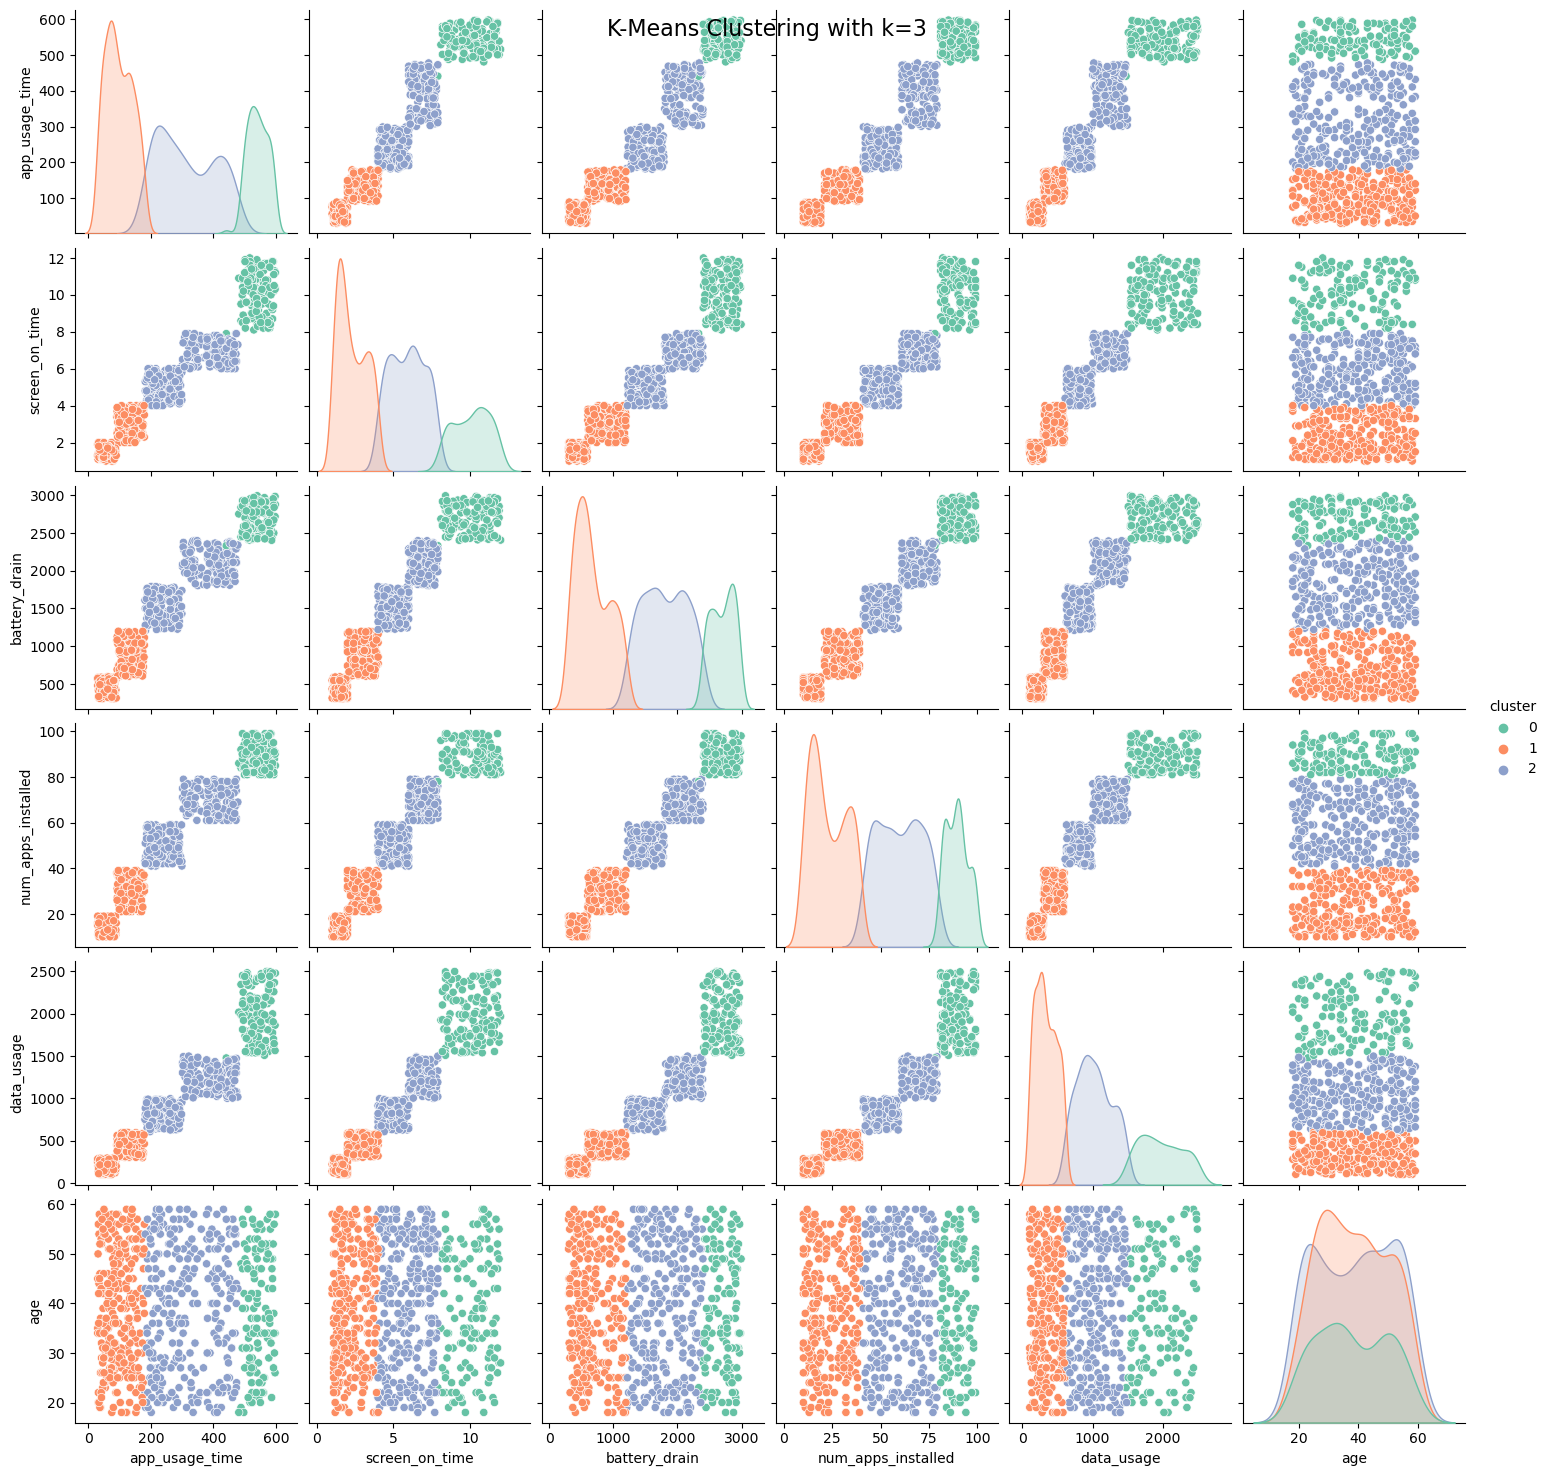

Cluster Centers (Centroids):
   app_usage_time  screen_on_time  battery_drain  num_apps_installed  \
0        1.522297        1.573780       1.433219            1.429444   
1       -0.980729       -0.972226      -1.036175           -1.030237   
2        0.242031        0.208398       0.341105            0.336985   

   data_usage       age  
0    1.627196 -0.034751  
1   -0.935096 -0.003889  
2    0.145093  0.020846  

Cluster Sizes:
cluster
1    282
2    281
0    137
Name: count, dtype: int64

Basic Statistics for Each Cluster:
cluster                             0            1            2
app_usage_time     count   137.000000   282.000000   281.000000
                   mean    540.686131    97.468085   313.985765
                   std      32.186897    41.955586    91.369813
                   min     441.000000    30.000000   181.000000
                   25%     516.000000    64.000000   228.000000
                   50%     540.000000    93.500000   298.000000
                 

In [25]:
# Optional: Apply K-Means with the chosen number of clusters (k = optimal)
optimal_k = 3  # Example: suppose 3 is the optimal k based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Step 6: Visualize the clustering result (optional)
# For example, using a pairplot or 3D visualization as discussed before
sns.pairplot(df, vars=numerical_columns, hue="cluster", palette="Set2")
plt.suptitle(f'K-Means Clustering with k={optimal_k}', size=16)
plt.show()

# Step 7: Print the cluster summary
# 7.1: Print the cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns))

# 7.2: Print the size of each cluster (number of points in each cluster)
print("\nCluster Sizes:")
cluster_sizes = df['cluster'].value_counts()
print(cluster_sizes)

# 7.3: Print basic statistics (mean, median, etc.) for each cluster
print("\nBasic Statistics for Each Cluster:")
cluster_stats = df.groupby('cluster')[numerical_columns].describe().T
print(cluster_stats)

# 7.4: Optionally, print the first few rows with cluster labels
print("\nFirst Few Rows with Cluster Labels:")
print(df[['device_model', 'gender', 'app_usage_time', 'cluster']].head())

/Users/vedshukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vedshukla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


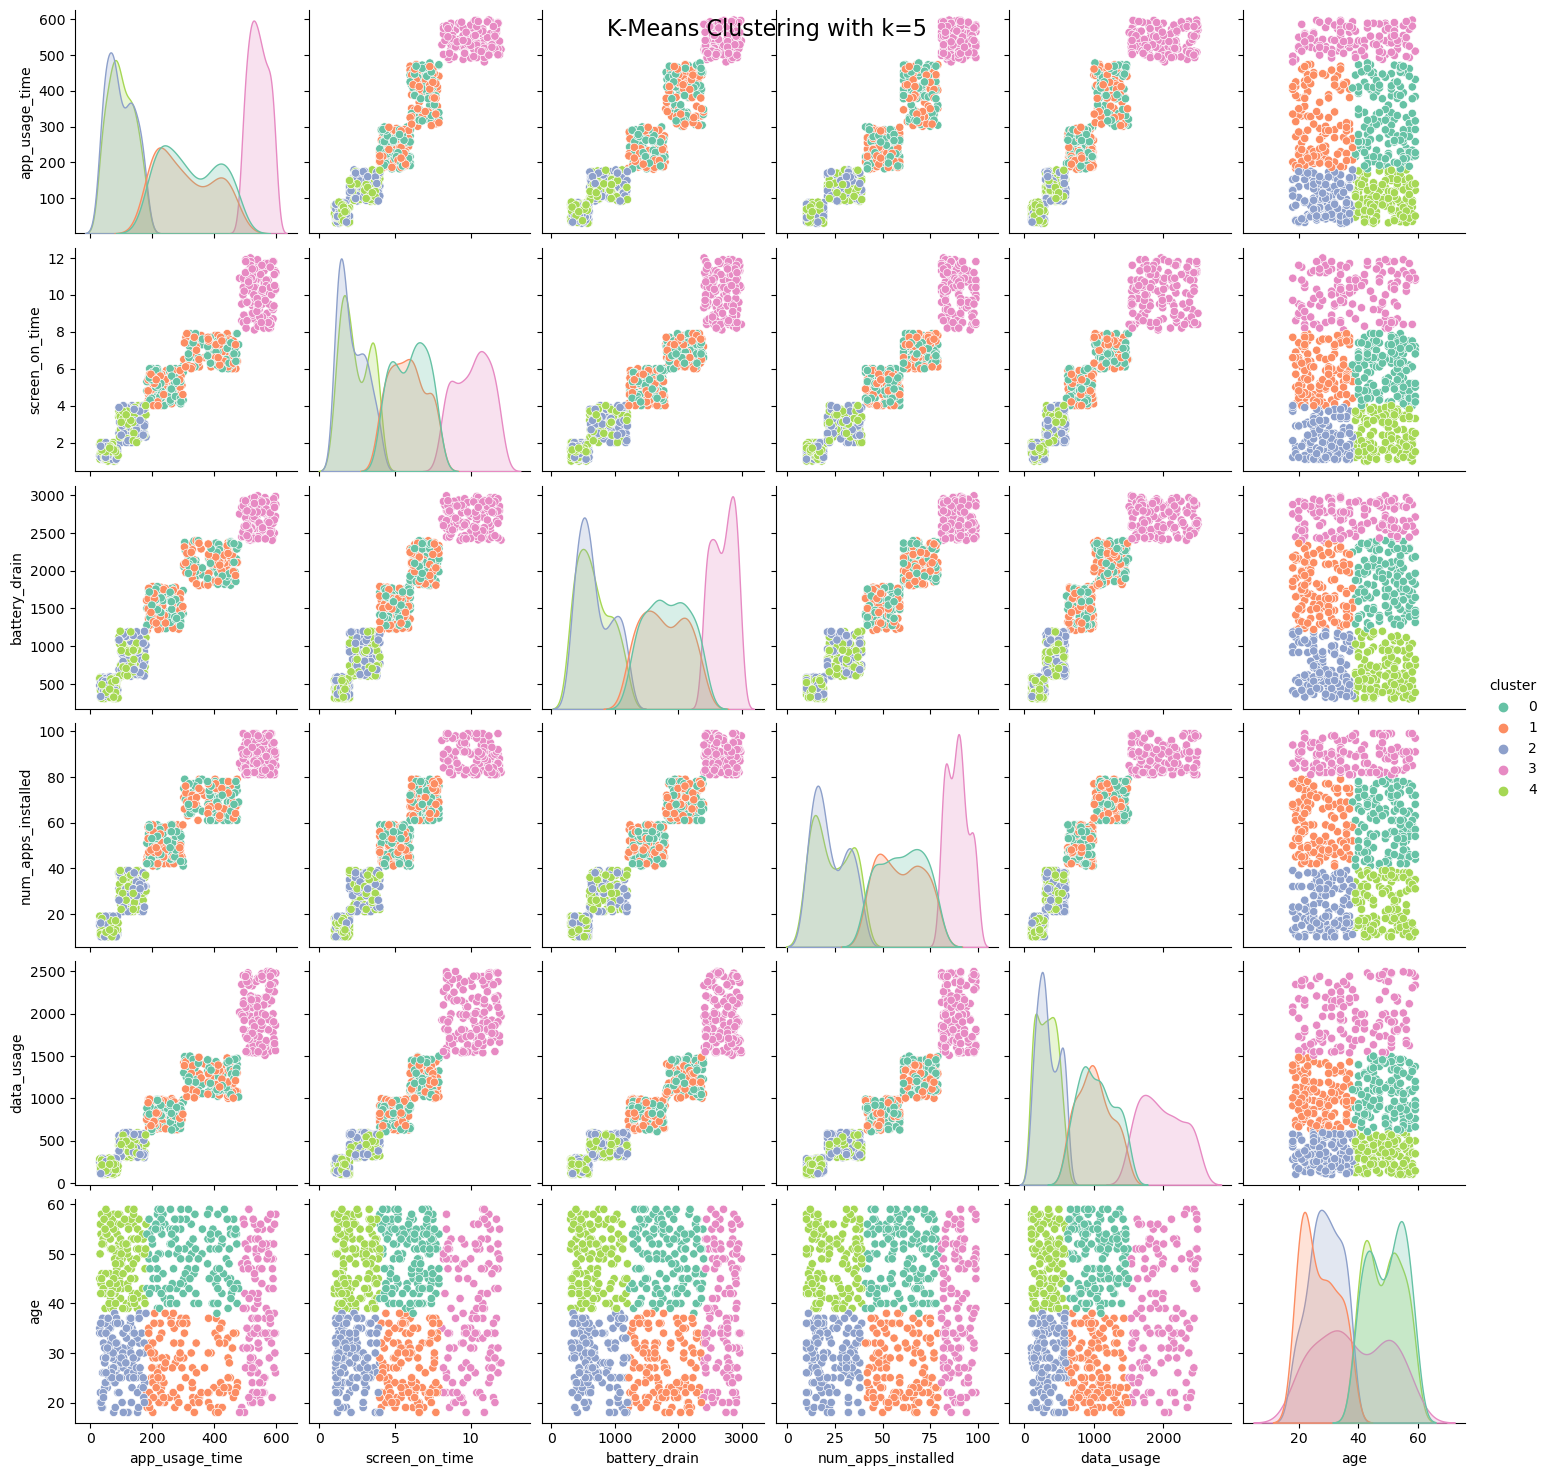

Cluster Centers (Centroids):
   app_usage_time  screen_on_time  battery_drain  num_apps_installed  \
0        0.281147        0.234535       0.375024            0.351125   
1        0.204182        0.184368       0.308451            0.326426   
2       -0.985882       -1.008630      -1.024327           -1.049537   
3        1.526437        1.579052       1.436509            1.432494   
4       -0.975351       -0.934239      -1.048538           -1.010097   

   data_usage       age  
0    0.170600  0.902004  
1    0.122220 -0.962154  
2   -0.918856 -0.807886  
3    1.632873 -0.025523  
4   -0.952041  0.835064  

Cluster Sizes:
cluster
0    148
2    144
4    138
3    136
1    134
Name: count, dtype: int64

Basic Statistics for Each Cluster:
cluster                             0            1            2            3  \
app_usage_time     count   148.000000   134.000000   144.000000   136.000000   
                   mean    320.912162   307.283582    96.555556   541.419118   
           

In [28]:
# Optional: Apply K-Means with the chosen number of clusters (k = optimal)
optimal_k = 5  # Example: suppose 3 is the optimal k based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Step 6: Visualize the clustering result (optional)
# For example, using a pairplot or 3D visualization as discussed before
sns.pairplot(df, vars=numerical_columns, hue="cluster", palette="Set2")
plt.suptitle(f'K-Means Clustering with k={optimal_k}', size=16)
plt.show()

# Step 7: Print the cluster summary
# 7.1: Print the cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns))

# 7.2: Print the size of each cluster (number of points in each cluster)
print("\nCluster Sizes:")
cluster_sizes = df['cluster'].value_counts()
print(cluster_sizes)

# 7.3: Print basic statistics (mean, median, etc.) for each cluster
print("\nBasic Statistics for Each Cluster:")
cluster_stats = df.groupby('cluster')[numerical_columns].describe().T
print(cluster_stats)

# 7.4: Optionally, print the first few rows with cluster labels
print("\nFirst Few Rows with Cluster Labels:")
print(df[['device_model', 'gender', 'app_usage_time', 'cluster']].head())